1b: write code to build a naive Bayes and KNN classifier

In [711]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [713]:
# Load the dataset
file_path = './spam_data.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

In [715]:
# Separate features and target again after dropping rows
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [716]:
# Separate features and target variable
features = data[['Win', 'Click', 'Team', 'Claim', 'Reminder']]
target = data['Category']
data_type = data['Type']

In [717]:
X_train = features[data_type == 'train']
y_train = target[data_type == 'train']
X_test = features[data_type == 'test']
y_test = target[data_type == 'test']

In [720]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [722]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [723]:
# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

In [724]:
# Evaluate Naive Bayes
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classifier:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [725]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can choose different values for k
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [726]:
# Evaluate KNN
print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classifier:
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



In [727]:
# Predict a particular test value
# Example test value (replace these values with a real test sample)
test_value = [0,0,1,0,1]  # Replace with the actual feature

In [728]:
test_value_df = pd.DataFrame([test_value], columns=['Win', 'Click', 'Team', 'Claim', 'Reminder'])


In [729]:
# Standardize the test value using the same scaler
test_value_scaled = scaler.transform(test_value_df)



In [730]:
# Get predictions for the test value
nb_prediction = nb_classifier.predict(test_value_scaled)
knn_prediction = knn_classifier.predict(test_value_scaled)

In [731]:
# Output the predictions
print("\nPrediction for the given test value:")
print("Naive Bayes prediction:", nb_prediction[0])
print("K-Nearest Neighbors prediction:", knn_prediction[0])


Prediction for the given test value:
Naive Bayes prediction: 0
K-Nearest Neighbors prediction: 0


2b. Write code  to fit the model using your favorite classifier (NB, KNN, or Decision tree)ask to output an ROC curve and AUC score. 

In [773]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


In [777]:
#Separate features and target
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values   

In [779]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [781]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [783]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Choose k=5 neighbors, can be tuned
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [785]:
# Get predicted probabilities for the positive class
y_prob = knn_classifier.predict_proba(X_test)[:, 1]


In [787]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


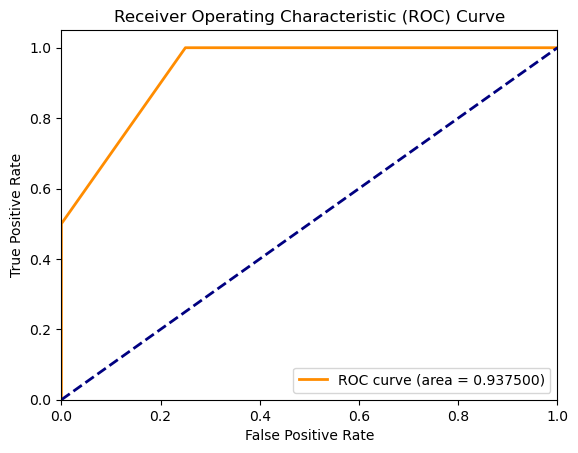

In [789]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [791]:
# Output the AUC score
print("AUC Score:", roc_auc)


AUC Score: 0.9375
